In [1]:
from os import path
import autolens as al
import autolens.plot as aplt


In [2]:
dataset_path = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/SDP81/Data/"

In [3]:
imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "ALMA_resampled.fits"),
    noise_map_path=path.join(dataset_path, "ALMA_rms_noise_map.fits"),
    psf_path=path.join(dataset_path, "alma_psf.fits"),
    pixel_scales=0.01,
    image_hdu=1, noise_map_hdu=1
)

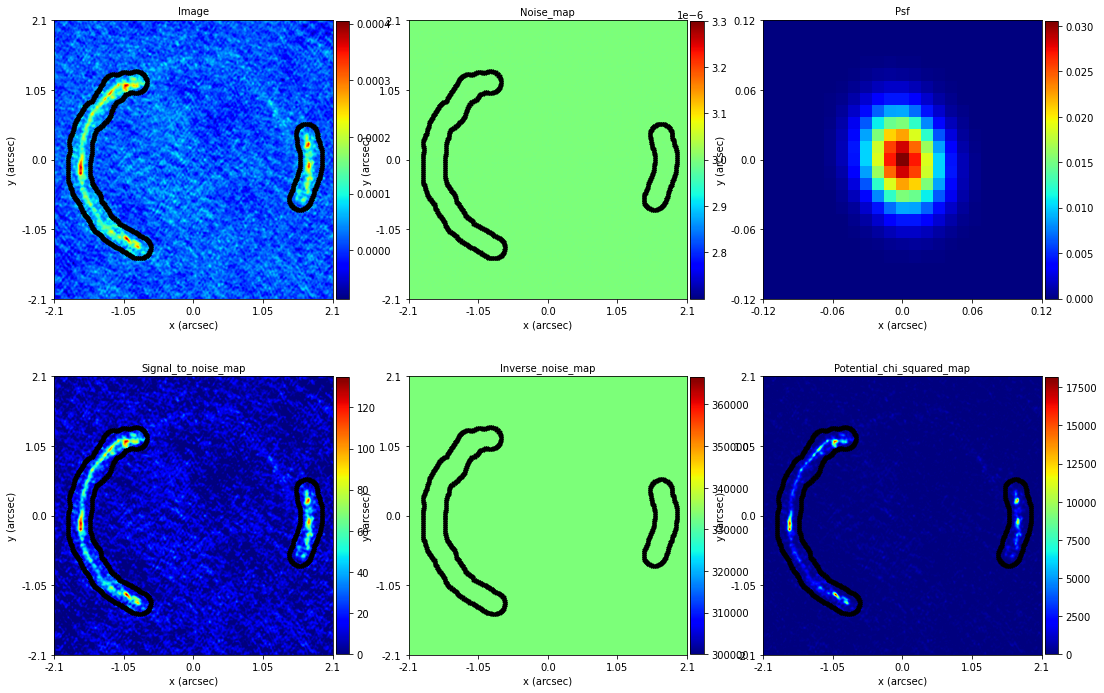

In [4]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{dataset_path}mask_gui.fits", hdu=0, pixel_scales=imaging.pixel_scales
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask_custom)

In [40]:
elliptical_comps_mass = al.convert.elliptical_comps_from(axis_ratio=0.80, phi=103)
elliptical_comps_shear = al.convert.shear_elliptical_comps_from(magnitude=0.04, phi=86)

mass_profile = al.mp.EllipticalPowerLaw(centre=(0.0, 0.0), elliptical_comps= elliptical_comps_mass ,
                                einstein_radius=1.62, slope=2.01)

In [41]:
lens_galaxy = al.Galaxy(redshift=0.299,
                        mass=mass_profile,
                        shear=al.mp.ExternalShear(elliptical_comps=elliptical_comps_shear))

In [33]:
source_galaxy = al.Galaxy(
     redshift=3.042,
    pixelization=al.pix.Rectangular(shape=(80,80)),
   regularization=al.reg.Constant(coefficient=3.5),
        )

In [42]:
masked_imaging = al.MaskedImaging(
        imaging=imaging, mask=mask_custom,
     )

In [35]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

In [ ]:
fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

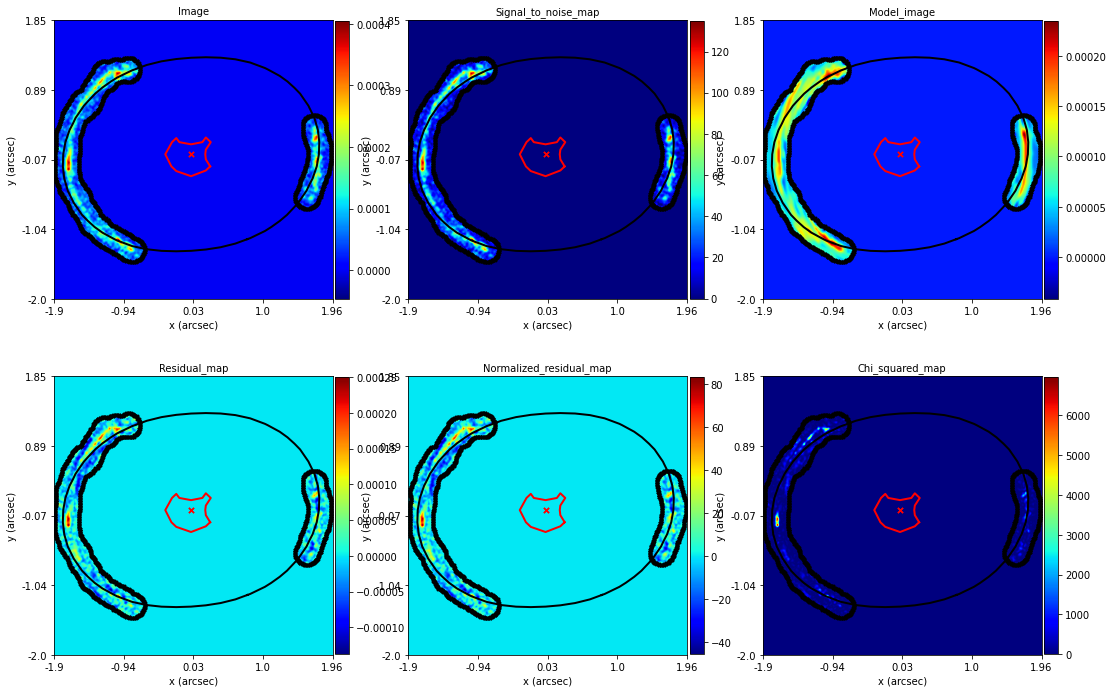

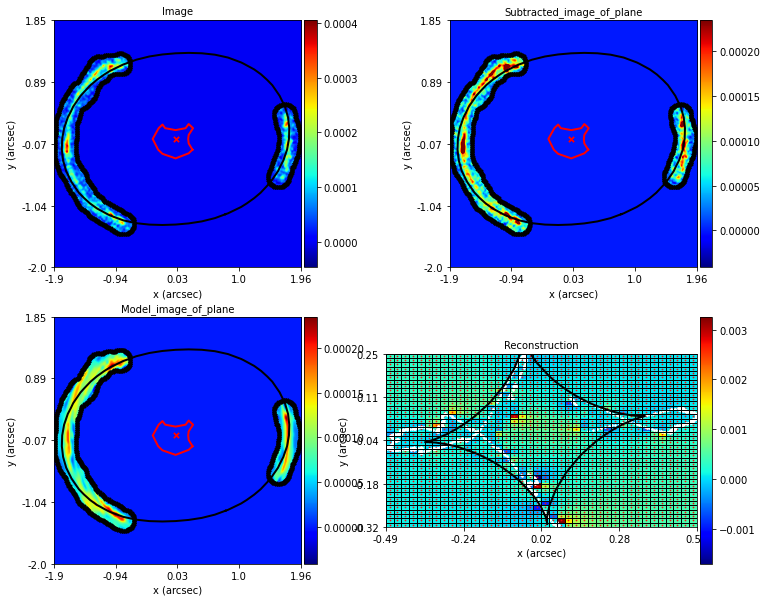

In [17]:
aplt.FitImaging.subplot_fit_imaging(fit=fit, include=aplt.Include(mask=True))
aplt.FitImaging.subplot_of_plane(
    fit=fit, plane_index=1, include=aplt.Include(mask=True)
)

In [43]:
#Now we set the tracer to the source galaxy



tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, al.Galaxy(redshift=3.042)])
source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=masked_imaging.grid)[1]



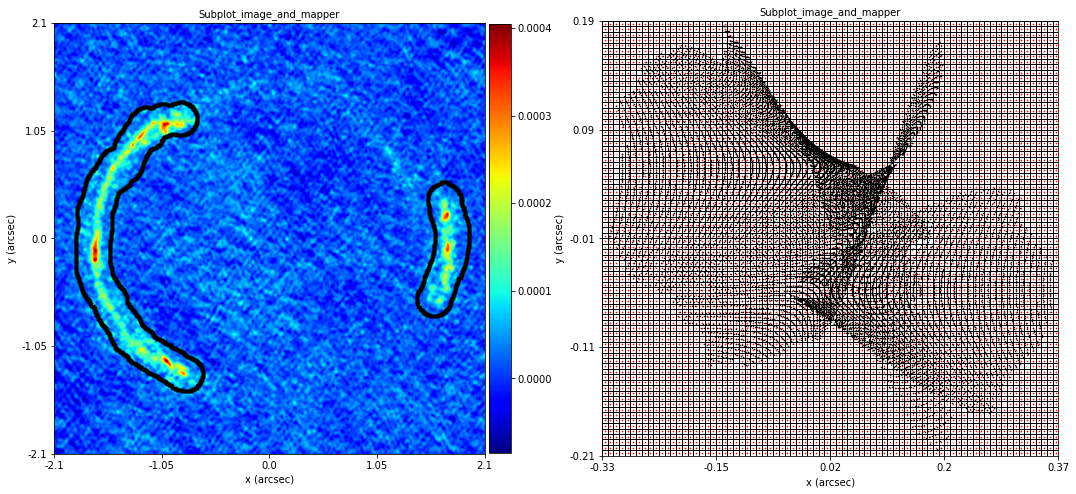

In [44]:
rectangular = al.pix.Rectangular(shape=(80, 80))

mapper = rectangular.mapper_from_grid_and_sparse_grid(grid=source_plane_grid)

aplt.Mapper.subplot_image_and_mapper(
    image=imaging.image,
    mapper=mapper,
    include=aplt.Include(mask=True, inversion_grid=True),
)

In [45]:
inversion = al.Inversion(
    masked_dataset=masked_imaging,
    mapper=mapper,
    regularization=al.reg.Constant(coefficient=4.5),
)

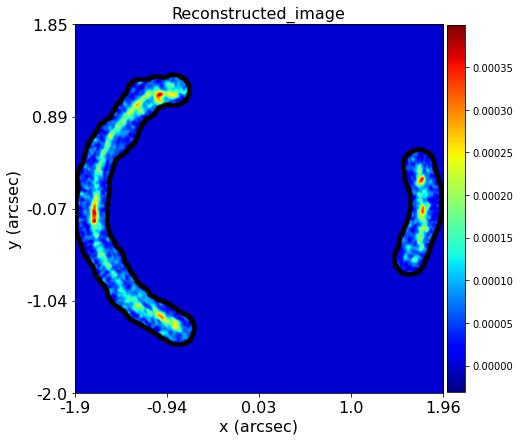

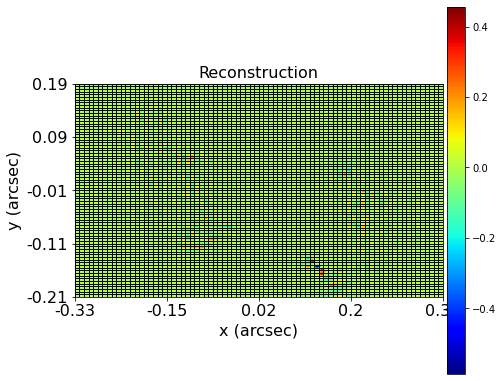

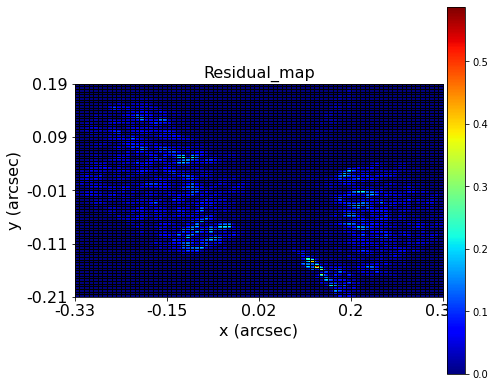

In [46]:
aplt.Inversion.reconstructed_image(inversion=inversion, include=aplt.Include(mask=True))

aplt.Inversion.reconstruction(
    inversion=inversion, include=aplt.Include(inversion_pixelization_grid=False, inversion_border=False)
)

aplt.Inversion.residual_map(inversion, include=aplt.Include(inversion_pixelization_grid=False,
                                                            inversion_border=False))

In [53]:
voronoi = al.pix.VoronoiMagnification(shape=(80,80))

image_plane_sparse_grid = voronoi.sparse_grid_from_grid(grid=masked_imaging.grid)

source_galaxy_voronoi = al.Galaxy(
    redshift=3.042, pixelization=voronoi, regularization=al.reg.Constant(coefficient=4.5)
)


tracer_voronoi = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy_voronoi])

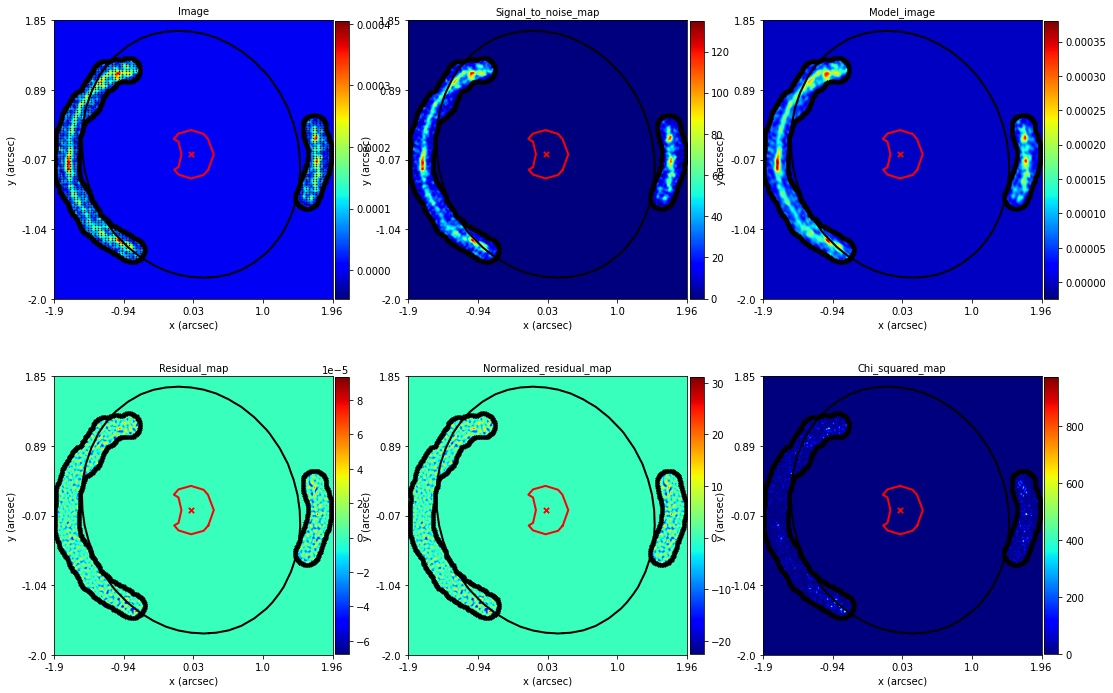

In [54]:

fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer_voronoi)

aplt.FitImaging.subplot_fit_imaging(
    fit=fit,
    include=aplt.Include(
        mask=True,
        inversion_image_pixelization_grid=True,
        inversion_pixelization_grid=True,
    ),
)


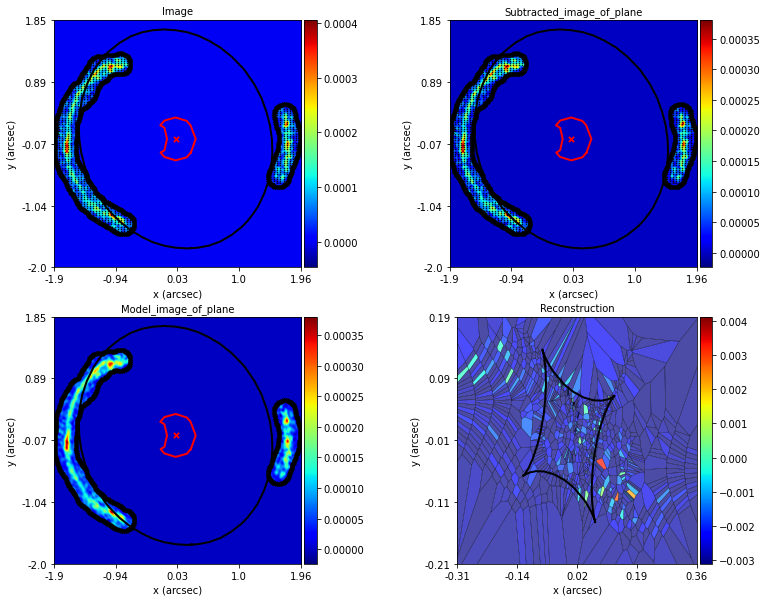

In [55]:
aplt.FitImaging.subplot_of_plane(
    fit=fit, plane_index=1, include=aplt.Include(mask=True, inversion_pixelization_grid=False,
                                                            inversion_border=False)
)

In [56]:
help(aplt.FitImaging.subplot_of_plane)

Help on function subplot_of_plane in module autolens.plot.fit_imaging_plots:

subplot_of_plane(fit, plane_index, include=None, sub_plotter=None)
    Plot the model datas_ of an analysis, using the *Fitter* class object.
    
    The visualization and output type can be fully customized.
    
    Parameters
    -----------
    fit : autolens.lens.fitting.Fitter
        Class containing fit between the model datas_ and observed lens datas_ (including residual_map, chi_squared_map etc.)
    output_path : str
        The path where the datas_ is output if the output_type is a file format (e.g. png, fits)
    output_filename : str
        The name of the file that is output, if the output_type is a file format (e.g. png, fits)
    output_format : str
        How the datas_ is output. File formats (e.g. png, fits) output the datas_ to harddisk. 'show' displays the datas_         in the python interpreter window.

